# 5-3. JSON 데이터
JSON = 경량의 데이터 표현 형식, 최근 웹/모바일 등을 중심으로 <b>서로 다른 플랫폼 간 데이터 교환</b>을 위해 활용되는 사실상 산업 표준<br>
특히 OpenAPI 등을 통해 다른 곳에서 제공하는 데이터를 수집할 경우 JSON 형식으로 되어 있는 경우가 많으므로<br>
Python에서도 HTTP 통신을 기반으로 OpenAPI로부터 JSON 형식의 데이터를 수집하고 이를 데이터 프레임으로 변환하는 기능을 제공

# #01. JSON 구조의 이해
key와 value의 쌍으로 이루어진 데이터 표현 형식으로 <b>Python의 딕셔너리와 동일한 구조</b>를 갖는다.
### 이름(key)과 값(value)의 쌍을 이루는 구조

In [ ]:
{"이름":"값", "이름":"값" ... }

> 값에는 문자, 문자열, 논리값(true/false) 모두 가능, 값이 문자열인 경우 쌍따옴표나 홑따옴표로 감싸 표현

### 값을 배열 형식으로 구성 가능
하나의 이름에 여러 개의 값을 포함시키고, 0부터 시작되는 인덱스 번호를 통해 값에 접근

In [ ]:
{"이름" : ["값0", "값1", "값2"] }

### 계층화 된 데이터의 표현

In [ ]:
{
    "이름" : {"이름":"값", "이름":"값" },
    "이름" : {"이름":"값", "이름":"값" }
};

### 목록형 데이터의 표현
가장 일반적인 형식<br>
하나의 key에 대응되는 값이 배열 형태이고, 배열의 각 원소가 동일한 구조를 갖는 JSON들로 구성된다.
> article[0].subject --> 글 제목

In [ ]:
{ 'article' : [
    {'subject':'글 제목', 'content' : '글 내용', 'writer':'작성자', 'date':'작성일'},
    {'subject':'글 제목', 'content' : '글 내용', 'writer':'작성자', 'date':'작성일'},
    ...
    {'subject':'글 제목', 'content' : '글 내용', 'writer':'작성자', 'date':'작성일'}
]}

# #02. 필요한 패키지 가져오기

In [1]:
import requests               # 통신 기능 제공
import json                   # 파이썬 내장 모듈
from pandas import DataFrame
from matplotlib import pyplot

# #03. 간단한 JSON 데이터 가져오기
requests 모듈이 지정된 URL의 내용을 모두 텍스트로만 가져오기 때문에 가져온 데이터의 형식에 따라 변환 처리 필요

## 1) URL 지정

In [2]:
simple_json_url = 'http://www.itpaper.co.kr/demo/py/simple.json'

## 2) 세션 생성

In [5]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36"
session= requests.Session()
session.headers.update({'User-agent':user_agent, 'referer':None})

## 3) JSON 데이터 가져오기

In [6]:
# 데이터 가져오기
r = session.get(simple_json_url)

# 결과 검사
if r.status_code != 200:
    print("[%d Error] %s" % (r.status_code, r.reason))
    quit()
    
#인코딩 형식 지정
r.encoding = 'utf-8'

# 텍스트 출력
print(type(r.text))
r.text

<class 'str'>


'{\n    "name": "갤럭시 S6",\n    "type": "삼성",\n    "img": "http://itpaper.co.kr/demo/app/img/GalaxyS6.png"\n}'

## 4) JSON 형식의 문자열을 딕셔너리로 변환
파이썬 내장 패키지닌 json 패키지의 `loads()` 함수를 사용하여 JSON 형식 문자열을 딕셔너리 구조로 변환

In [7]:
result = json.loads(r.text)
print(type(result))
result

<class 'dict'>


{'name': '갤럭시 S6',
 'type': '삼성',
 'img': 'http://itpaper.co.kr/demo/app/img/GalaxyS6.png'}

## 5) 딕셔너리를 DataFrame으로 변환
Dataframe을 생성 가능한 파라미터 형식
1. 2차 리스트
2. 모든 원소가 같은 크기의 리스트인 딕셔너리
3. 모든 원소가 같은 구조의 딕셔너리인 리스트

> 수신 결과는 단순한 딕셔너리이므로 이 값을 통째로 리스트에 넣어줘야 한다 (=3번 케이스)

In [8]:
# 가져온 딕셔너리를 List의 원소로 활용하여 새로운 리스트 생성
data_list = [result]

simple_df = DataFrame(data_list)
simple_df

,name,type,img
0,갤럭시 S6,삼성,http://itpaper.co.kr/demo/app/img/GalaxyS6.png


# #03. 리스트 형식의 데이터를 포함하는 JSON
## 1) 데이터 수집
### JSON 가져오기

In [10]:
# JSON URL
json_list_url = 'http://www.itpaper.co.kr/demo/py/student.json'

# 준비된 URL의 컨텐츠 가져오기
r = session.get(json_list_url)

# 접속에 실패한 경우에 대한 예외 처리
if r.status_code != 200:
    print("[%d Error] %s" % (r.status_code, r.reason))
    quit()
    
#인코딩 형식 지정
r.encoding = 'utf-8'

# 가져온 결과를 딕셔너리로 변환
result = json.loads(r.text)
result

{'student': [{'name': '철수', 'math': 85, 'kor': 80, 'eng': 70},
  {'name': '영이', 'math': 92, 'kor': 70, 'eng': 85},
  {'name': '순이', 'math': 61, 'kor': 100, 'eng': 72}]}

### 데이터 프레임으로 변환
가져온 결과에서 student 키에 해당하는 리스트를 추출, 데이터프레임으로 변환

In [11]:
student_df = DataFrame(result['student'])
student_df

,name,math,kor,eng
0,철수,85,80,70
1,영이,92,70,85
2,순이,61,100,72


## 2) 데이터 전처리
### 컬럼이름 변경

In [12]:
student_df2 = student_df.rename(columns={'name':'이름', 'math':'수학', 'kor':'국어', 'eng':'영어'})
student_df2

,이름,수학,국어,영어
0,철수,85,80,70
1,영이,92,70,85
2,순이,61,100,72


### 학생 이름을 인덱스로 지정

In [13]:
성적표df = student_df2.set_index('이름')
성적표df

,수학,국어,영어
이름,,,
철수,85,80,70
영이,92,70,85
순이,61,100,72


### 컬럼 순서 변경

In [14]:
성적표df = 성적표df.reindex(columns=['국어','영어','수학'])
성적표df

,국어,영어,수학
이름,,,
철수,80,70,85
영이,70,85,92
순이,100,72,61


## 3) 데이터 시각화

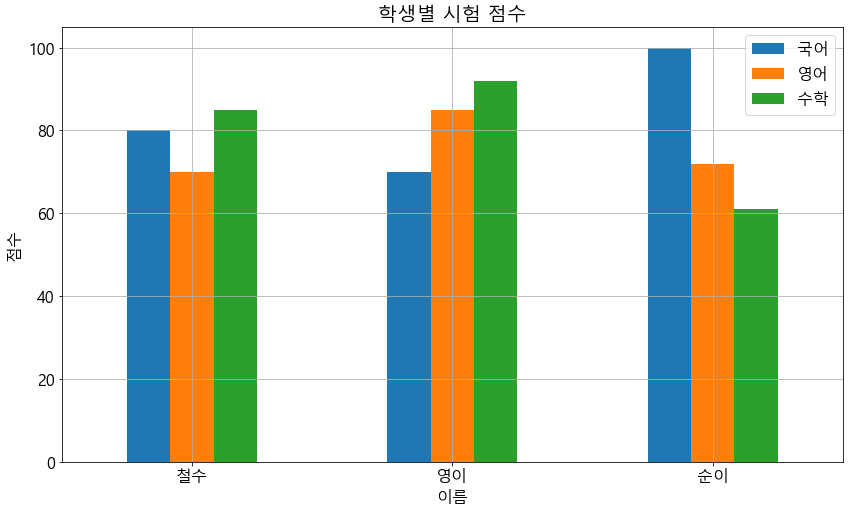

In [16]:
# 그래프를 만들기 위한 한글 폰트 설정
pyplot.rcParams['font.family'] = 'Malgun Gothic'
pyplot.rcParams['font.size'] = 16
pyplot.rcParams['figure.figsize'] = (14, 8)

# 전체 컬럼에 대한 시각화
성적표df.plot.bar(rot=0)
pyplot.grid()
pyplot.title('학생별 시험 점수')
pyplot.legend()
pyplot.ylabel('점수')
pyplot.show()